# Example 1 - A simple Sequential Forward Selection example
Initializing a simple classifier from scikit-learn:

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

We choose to select the best 3 features from the Iris dataset via Sequential Forward Selection (SFS). Here, we have valued forward with True and floating with False. As cv=0, any cross-validation had not been done, therefore, the performance (here: 'accuracy') is computed entirely on the training set.

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-05-17 17:33:05] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-05-17 17:33:05] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-05-17 17:33:05] Features: 3/3 -- score: 0.9733333333333334

Via the subsets_ attribute, we can take a look at the selected feature indices at each step:

In [3]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('3',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('2', '3')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('1', '2', '3')}}

here 'feature_names' entry is simply a string notation of the 'feature_idx' in this case.

we can also provide custom feature names via the fit method's custom_feature_names parameter:

In [4]:
feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
sfs1 = sfs1.fit(X, y, custom_feature_names=feature_names)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-05-17 17:33:05] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-05-17 17:33:05] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-05-17 17:33:05] Features: 3/3 -- score: 0.9733333333333334

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('petal width',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('petal length', 'petal width')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('sepal width', 'petal length', 'petal width')}}

Furthermore, we can access the indices of the 3 best features directly via the k_feature_idx_ attribute:

In [5]:
sfs1.k_feature_idx_

(1, 2, 3)

And similarly, to obtain the names of these features, given that we provided an argument to the custom_feature_names parameter, we can refer to the sfs1.k_feature_names_ attribute:

In [6]:
sfs1.k_feature_names_

('sepal width', 'petal length', 'petal width')

**k_score_** is used to show the prediction score of features

In [7]:
sfs1.k_score_

0.9733333333333334

# Example 2 - Toggling between SFS, SBS, SFFS, and SBFS

**forward** and **floating** parameters are used to toggle between **SFS, SBS, SFFS, and SBFS** as shown below. here, we are performing (stratified) 4-fold cross-validation for more robust estimates in contrast to Example 1. Via n_jobs=-1, we choose to run the cross-validation on all our available CPU cores.

In [8]:
# Sequential Forward Selection
sfs = SFS(knn, 
          k_features=3, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(X, y)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(X, y)

print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sffs = sffs.fit(X, y)

print('\nSequential Forward Floating Selection (k=3):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(knn, 
           k_features=3, 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(X, y)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088

Sequential Backward Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088

Sequential Forward Floating Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088

Sequential Backward Floating Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088


Here, we get similar results regardless of the algorithms used. Because we selected best 3 out of 4

# Example 3 - Visualizing the results in DataFrames

We can visualize the output from the feature selection in a pandas DataFrame format using the get_metric_dict method of the SequentialFeatureSelector object. Standard deviation and standard errors of the cross-validation scores can be seen in the columns std_dev and std_err.

Below, we see the DataFrame of the Sequential Forward Selector from Example 2:

In [9]:
import pandas as pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9736842105263158, 0.9473684210526315, 0.891...",0.953236,"(3,)",0.064132,0.040008,0.023099
2,"(2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.959993,"(2, 3)",0.048319,0.030143,0.017403
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(1, 2, 3)",0.030639,0.019113,0.011035


Now, let's compare it to the Sequential Backward Selector:

In [10]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.953236,"(0, 1, 2, 3)",0.03602,0.022471,0.012974
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(1, 2, 3)",0.030639,0.019113,0.011035


Both SFS and SBFS found the same "best" 3 features, however, the intermediate steps where obviously different.

The ci_bound column in the DataFrames above represents the confidence interval around the computed cross-validation scores. By default, a confidence interval of 95% is used, but we can use different confidence bounds via the confidence_interval parameter. E.g., the confidence bounds for a 90% confidence interval can be obtained as follows:

In [11]:
pd.DataFrame.from_dict(sbs.get_metric_dict(confidence_interval=0.90)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.953236,"(0, 1, 2, 3)",0.027658,0.022471,0.012974
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(1, 2, 3)",0.023525,0.019113,0.011035


# Example 4 - Plotting the results
Using plot_sequential_feature_selection, we can also visualize the results using matplotlib figures.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2021-05-17 17:33:08] Features: 1/4 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-05-17 17:33:08] Features: 2/4 -- score: 0.9666666666666668[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-05-17 17:33:08] Features: 3/4 -- score: 0.9533333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | e

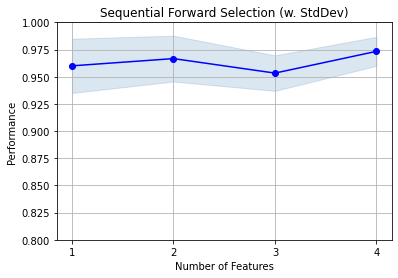

In [12]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sfs = SFS(knn, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

# Example 5 - Sequential Feature Selection for Regression
SequentialFeatureSelector also supports scikit-learn's estimators for regression like other classifiaction examples.

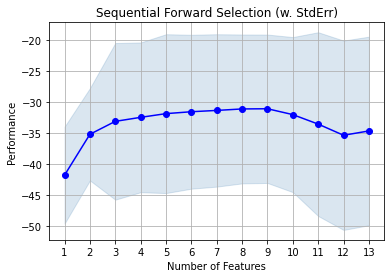

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# Example 6 - Feature Selection with Fixed Train/Validation Splits
Voluntarily, you can use PredefinedHoldoutSplit class to specify your own, fixed training and validation split.

In [14]:
from sklearn.datasets import load_iris
from mlxtend.evaluate import PredefinedHoldoutSplit
import numpy as np


iris = load_iris()
X = iris.data
y = iris.target

rng = np.random.RandomState(123)
my_validation_indices = rng.permutation(np.arange(150))[:30]
print(my_validation_indices)


[ 72 112 132  88  37 138  87  42   8  90 141  33  59 116 135 104  36  13
  63  45  28 133  24 127  46  20  31 121 117   4]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



knn = KNeighborsClassifier(n_neighbors=4)
piter = PredefinedHoldoutSplit(my_validation_indices)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=piter)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-05-17 17:33:10] Features: 1/3 -- score: 0.9666666666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-05-17 17:33:10] Features: 2/3 -- score: 0.9666666666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-05-17 17:33:10] Features: 3/3 -- score: 0.9666666666666667

# Example 7 - Using the Selected Feature Subset For Making New Predictions

In [16]:
# Initialize the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=1)

knn = KNeighborsClassifier(n_neighbors=4)

In [17]:
# Select the "best" three features via
# 5-fold cross-validation on the training set.

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)
sfs1 = sfs1.fit(X_train, y_train)
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (1, 2, 3)


In [18]:
# generate the new subsets based on the selected features
# note that the transform call is equivalent to X_train[:, sfs1.k_feature_idx_]

X_train_sfs = sfs1.transform(X_train)
X_test_sfs = sfs1.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn.fit(X_train_sfs, y_train)
y_pred = knn.predict(X_test_sfs)

# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 96.00 %
